In [48]:
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(100)

In [49]:
class LinearLayer:
    def __init__(self, W, b):
        self.W = W
        self.b = b
    
    
    def forward(self):
        '''
        output = w*x + b
        '''
        pass
    
    def backward(self):
        pass

In [50]:
class CrossEntropyLoss:
    def forward(self):
        pass
    
    def backward(self):
        pass

In [51]:
class NN:
    
    def forward(self):
        pass

In [60]:
class LR:
    def __init__(self, lr):
        self.W = np.random.normal(0, 0.1, 2)
        self.b = np.random.normal(0, 0.1, 1)
        self.learning_rate = lr
    
    def forward(self, X, y):
        z = X.dot(self.W) + self.b
        a = 1 / (1 + np.exp(-z))
        loss = -(y*np.log(a) + (1-y)*np.log(1-a))
        return loss
    
    def backward(self, X, y):
        z = X.dot(self.W) + self.b
        a = 1 / (1 + np.exp(-z))
        self.W = self.W - self.learning_rate * (a - y) * X
        self.b = self.b - self.learning_rate * (a - y)



In [53]:
def toy_examples(N):    
    mean_1 = [3, 3]
    cov_1 = [[1, 0], [0, 1]]
    X_1 = np.random.multivariate_normal(mean_1, cov_1, N)
    y_1 = [1] * N
    
    mean_2 = [5, 0]
    cov_2 = [[1, 0], [0, 1]]
    X_2 = np.random.multivariate_normal(mean_2, cov_2, N)
    y_2 = [0] * N
    
    X = np.r_[X_1, X_2]
    y = np.r_[y_1, y_2]
    
    permutated_idx = np.random.permutation(2 * N)
    X = X[permutated_idx]
    y = y[permutated_idx]
    
    return X, y

N = 100
X, y = toy_examples(N)

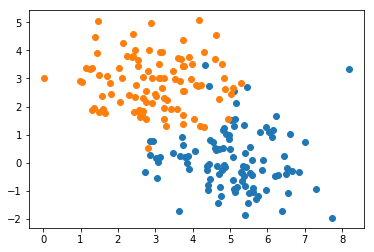

In [54]:
plt.figure()
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'o')
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'o')
plt.show()

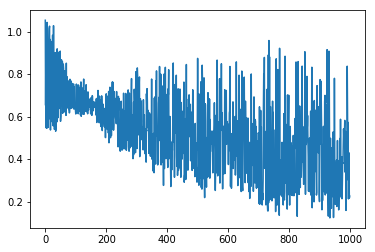

In [74]:
n_iterations = 1000
lr = 0.001

lr = LR(lr)
losses = []
for _ in range(n_iterations):
    
    single_idx = np.random.randint(0, N)
    single_X, single_y = X[single_idx], y[single_idx]
    
    loss = lr.forward(single_X, single_y)
    losses.append(loss)
    
    lr.backward(single_X, single_y)
    
plt.plot(range(len(losses)), losses)
plt.show()

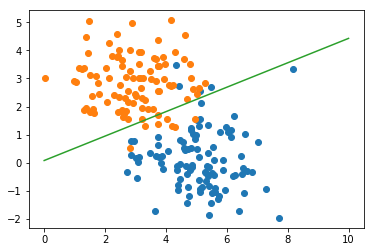

In [75]:
plt.figure()
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'o')
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'o')

line_x = [0, 10]
line_y = lr.W * line_x + lr.b
plt.plot(line_x, line_y)
plt.show()